In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

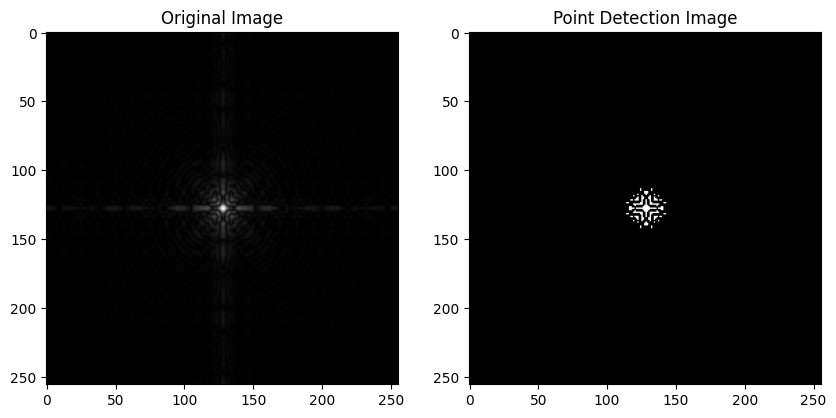

In [5]:
T = 70

img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0305(a)(DFT_no_log).tif", cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
mask = np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]])
for row in range(1, rows+1):
    for col in range(1, cols+1):
        replace = np.sum(img1[row-1:row+2, col-1:col+2] * mask)
        if replace > T:
            filtered_img[row-1, col-1] = 255
        else:
            filtered_img[row-1, col-1] = 0

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title("Point Detection Image")
plt.show()

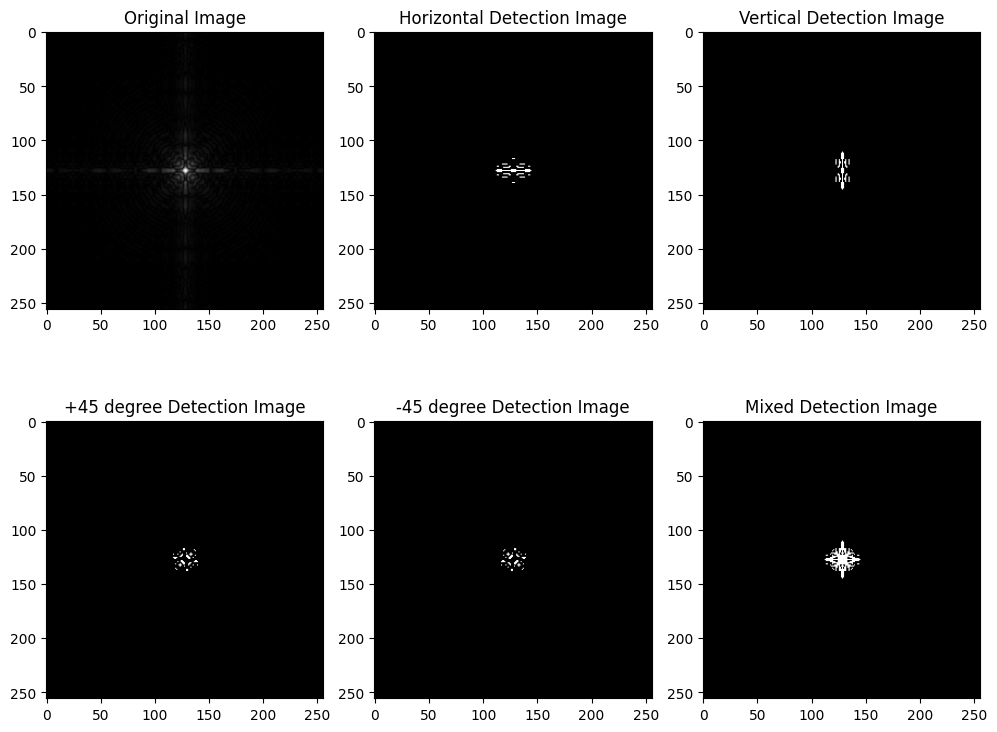

In [6]:
T = 50

img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0305(a)(DFT_no_log).tif", cv2.IMREAD_GRAYSCALE)

rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)

horizontal_mask = np.array([[-1,-1,-1],
                            [ 2, 2, 2],
                            [-1,-1,-1]])

vertical_mask = np.array([[-1, 2,-1],
                          [-1, 2,-1],
                          [-1, 2,-1]])

deg45_mask = np.array([[-1,-1, 2],
                       [-1, 2,-1],
                       [ 2,-1,-1]])

degn45_mask = np.array([[ 2,-1,-1],
                        [-1, 2,-1],
                        [-1,-1, 2]])

masks = [horizontal_mask, vertical_mask, deg45_mask, degn45_mask]
merged_img = np.zeros_like(img)
output  = []

for mask in masks:
    filtered_img = np.zeros_like(img)
    for row in range(1, rows+1):
        for col in range(1, cols+1):
            replace = np.sum(img1[row-1:row+2, col-1:col+2] * mask)
            if replace > T:
                filtered_img[row-1,col-1]=  255
                merged_img[row-1,col-1] = 255
            else:
                filtered_img[row-1,col-1] =  0
    output.append(filtered_img)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(output[0], cmap='gray')
plt.title("Horizontal Detection Image")

plt.subplot(2, 3, 3)
plt.imshow(output[1], cmap='gray')
plt.title("Vertical Detection Image")

plt.subplot(2, 3, 4)
plt.imshow(output[2], cmap='gray')
plt.title("+45 degree Detection Image")

plt.subplot(2, 3, 5)
plt.imshow(output[3], cmap='gray')
plt.title("-45 degree Detection Image")

plt.subplot(2, 3, 6)
plt.imshow(merged_img, cmap='gray')
plt.title("Mixed Detection Image")

plt.tight_layout()
plt.show()


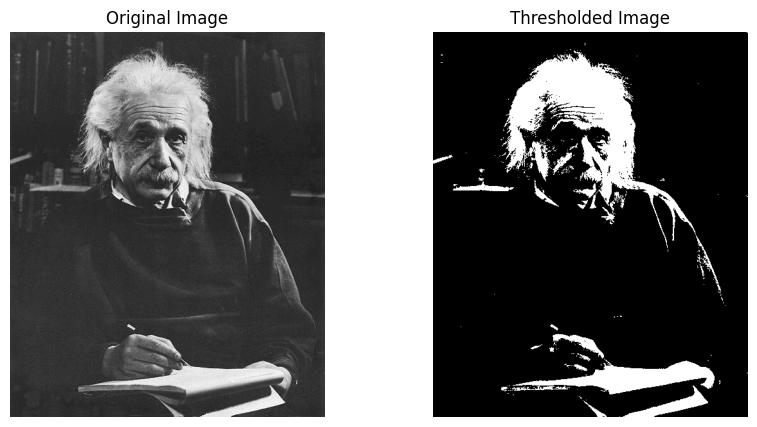

In [12]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif', cv2.IMREAD_GRAYSCALE)

if img.ndim == 2:
    rows, cols = img.shape
elif img.ndim == 3:
    rows, cols, _ = img.shape
else:
    raise ValueError("Unsupported number of image dimensions")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

delta = 3
Tnew = np.min(img) + 1
while abs(T - Tnew) >= delta:
    T = Tnew
    if img.ndim == 2:
        totalCells = rows * cols
        G1 = []
        G2 = []
        for row in range(rows):
            for col in range(cols):
                if img[row][col] > T:
                    G1.append(img[row][col])
                else:
                    G2.append(img[row][col])
        m1 = np.mean(G1)
        m2 = np.mean(G2)
    elif img.ndim == 3:
        raise ValueError("Thresholding not supported for color images")

    Tnew = (m1 + m2) / 2

for row in range(rows):
    for col in range(cols):
        if img[row][col] > T:
            img[row][col] = 255
        else:
            img[row][col] = 0

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()